In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

%store -r DISCO_ROOT_FOLDER
if "DISCO_ROOT_FOLDER" in globals():
    os.chdir(DISCO_ROOT_FOLDER)
    sys.path.append(DISCO_ROOT_FOLDER)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

line_lengths = 10 * np.arange(1,11,1)
line_datasets = [[(np.array(list([x * 0.1, y] for y in range(10,101,10) for x in range(10,101*i,10))), np.array(sum([[c] * 10*i for c in range(10)], [])))] for i in range(1,11,1)]

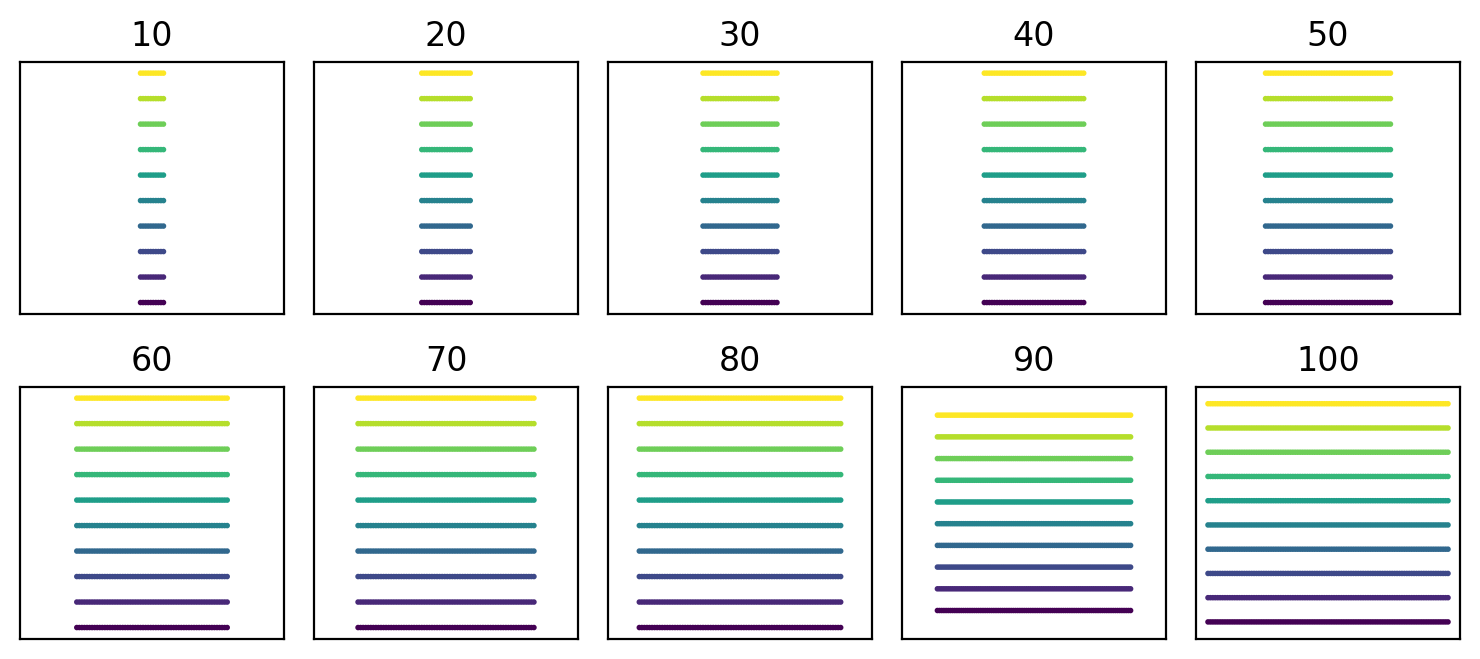

In [3]:
import matplotlib.pyplot as plt
from src.utils.plots import plot_datasets

fig = plot_datasets(line_datasets, line_lengths, n_cols=5, figsize=1.5)

axes = fig.get_axes()
for ax in axes:
    ax.set_aspect("equal", adjustable="datalim")

plt.savefig("imgs/Lines_data.png", bbox_inches="tight", pad_inches=0)

In [4]:
from src.utils.experiments import cache, calc_eval_measures_for_multiple_datasets
from src.utils.metrics import create_and_rescale_df


eval_results = cache(
    "Lines",
    calc_eval_measures_for_multiple_datasets,
    [line_datasets, line_lengths],
    recalc=False,
)

df = create_and_rescale_df(eval_results)

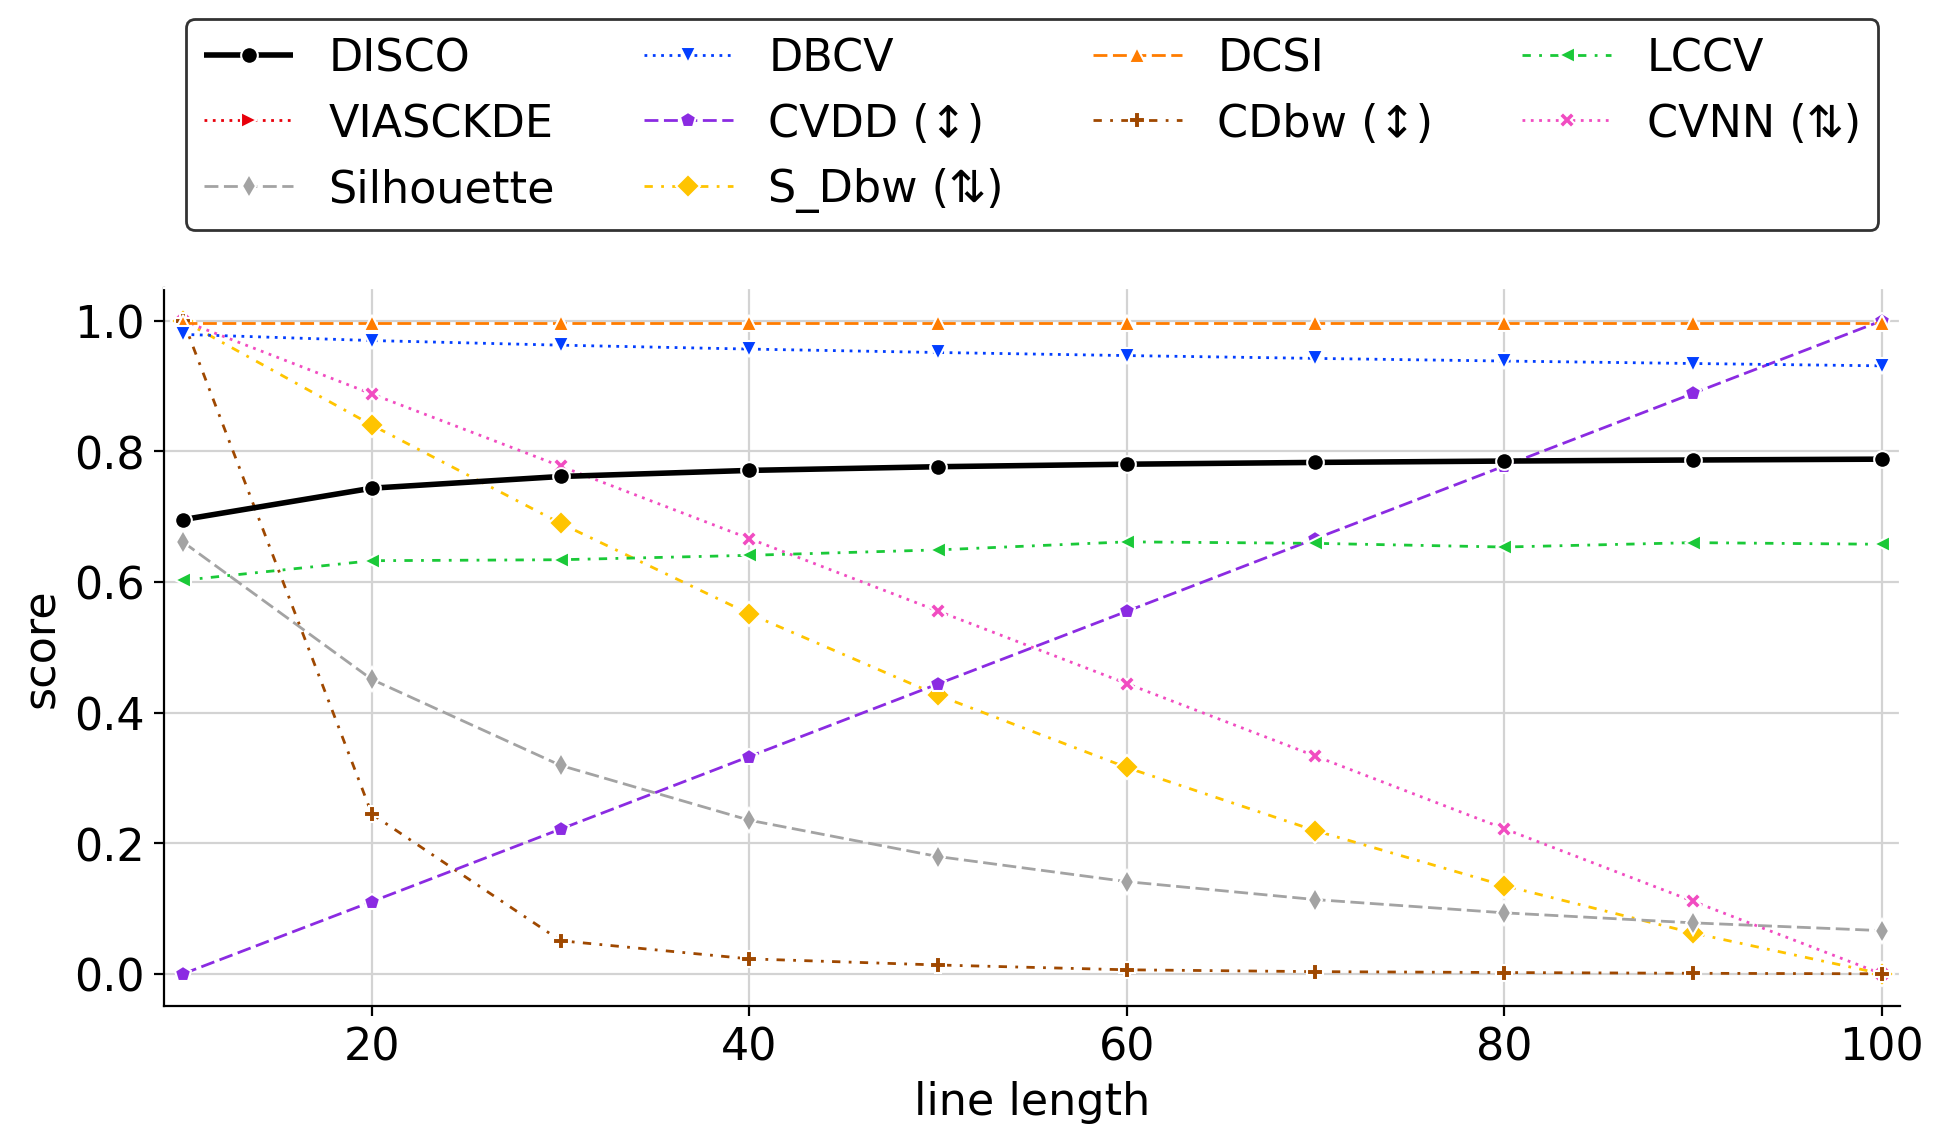

In [5]:
from src.utils.plots import plot_lineplot

eps = 1
x_range = line_lengths[0] - eps, line_lengths[-1] + eps

plot_lineplot(
    df, "dataset", "value", "measure", y_label="score", x_label="line length", x_range=x_range, y_range=(None, None)
)
plt.savefig("imgs/Line.png", bbox_inches="tight", pad_inches=0)